In [2]:
import numpy as np
import pandas as pd
from random import  uniform
import matplotlib.pyplot as plt

# Classe do neurônio de Rosenblatt

In [3]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.carrega_dados()
        self.pesos = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
        
    def carrega_dados(self):
        dataset = np.fromfile('dataAll.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados=dataset.reshape(linhas, colunas)
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def somatorio(self):
        numero_de_ajustes = 0
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            print("Pesos: ",self.pesos)
            print("Entrada: ",entrada," Yd: ",yd," Yr: ",yr,"\n")
            
            numero_de_ajustes += 1
            
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                print("Numero de ajustes: ",numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        print("Numero de ajustes: ",numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos

        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        while(self.somatorio() == False):
            self.epocas+=1
            print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        
        self.descobre_x1_x2()
        
        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos: ",sum(self.total_de_ajustes))
            
n = Neuronio()

# Dataset

In [4]:
n.dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

# Pesos iniciais

In [5]:
n.pesos

array([ 0.17800993, -0.39701958, -0.39762467])

# Treinamento

In [6]:
n.treino()

-----------------------------
Época:  1 

Pesos:  [ 0.17800993 -0.39701958 -0.39762467]
Entrada:  [  -1.     -363.7884  244.1423]  Yd:  0  Yr:  1 

Numero de ajustes:  1
-----------------------------
Época:  2 

Pesos:  [  0.27800993  35.98182042 -24.81185467]
Entrada:  [  -1.     -363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [  0.27800993  35.98182042 -24.81185467]
Entrada:  [  -1.      328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [  0.27800993  35.98182042 -24.81185467]
Entrada:  [  -1.     -164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  0.27800993  35.98182042 -24.81185467]
Entrada:  [ -1.     536.5905 764.9575]  Yd:  0  Yr:  1 

Numero de ajustes:  4
-----------------------------
Época:  3 

Pesos:  [   0.37800993  -17.67722958 -101.30760467]
Entrada:  [  -1.     -363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [   0.37800993  -17.67722958 -101.30760467]
Entrada:  [  -1.      328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  -17.67722958 -101.30760467]
Entrada:  [  -1

Entrada:  [  -1.     -925.9171  924.6059]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  132.00446042 -179.49248467]
Entrada:  [ -1.     176.9271 631.7058]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  132.00446042 -179.49248467]
Entrada:  [ -1.     835.2961 991.2583]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  132.00446042 -179.49248467]
Entrada:  [  -1.      -49.2427 -170.8828]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  132.00446042 -179.49248467]
Entrada:  [  -1.     -491.8686 -166.2873]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  132.00446042 -179.49248467]
Entrada:  [  -1.     -757.4591   66.6746]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  132.00446042 -179.49248467]
Entrada:  [  -1.     -501.2944  -33.3836]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  132.00446042 -179.49248467]
Entrada:  [ -1.     825.987  798.5583]  Yd:  1  Yr:  0 

Numero de ajustes:  19
-----------------------------
Época:  23 

Pesos:  [  0.57800993 214.60316042 -99.63665467]
Entrada:  [  -1.     -363.7884  244.1423]  Yd:  0 

Entrada:  [  -1.     -157.5954  509.7154]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [ -1.     347.5842 747.5316]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [ -1.     664.115  443.1572]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -291.7673 -782.0354]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.      968.0774 -159.9259]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [ -1.     713.7451 645.4212]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -696.027  -170.8061]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -651.0622  239.3653]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -281.1958  593.16  ]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
E

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.      774.8274 -573.8098]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.      145.751  -800.1087]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [ -1.     573.3428 820.344 ]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.      679.8148 -477.5763]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.      418.3149 -572.2286]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -621.1581  157.7837]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -383.7429 -192.64  ]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -398.2428  359.7078]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -734.7721 -211.9347]  Yd:  0  Yr: 

Entrada:  [  -1.      870.4499 -372.2174]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -982.7927   75.426 ]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [ -1.     919.1827 823.1511]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -748.3868  690.3022]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.      469.4094 -474.1404]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -933.1486 -386.6805]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [ -1.      39.3237 956.2135]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.       80.045  -770.2316]  Yd:  1  Yr:  1 

Pesos:  [   0.67800993  214.55576042 -211.83329467]
Entrada:  [  -1.     -150.2335  369.5757]  Yd:  0  Yr:  0 

Pesos:  [   0.67800993  214.55576042 -211.83329467

Entrada:  [ -1.     -96.4842  -5.0719]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -594.593   175.3834]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -323.3799 -919.7955]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [ -1.     -62.5624 648.9382]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.    -395.789  109.785]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [ -1.     875.4599 140.7457]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [ -1.     390.6079  11.2374]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -455.4894 -617.6617]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [ -1.     636.9103 823.0257]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  

Entrada:  [  -1.     -385.2244  792.4774]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [ -1.     689.5162  87.7345]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [ -1.     277.0507 971.5614]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -509.401  -552.6842]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -585.0518 -848.7708]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -756.5549  355.0426]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -846.4499  -56.2246]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [ -1.     980.7636 131.2603]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -718.1944 -514.5538]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
E

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.       85.3591 -848.5988]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -207.3007  869.0272]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -118.2199 -729.8267]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [ -1.     386.8343 116.2864]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -482.2348  830.8497]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.      -57.7298 -556.1733]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -123.372  -783.7469]  Yd:  1  Yr:  1 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.     -284.5961  874.3352]  Yd:  0  Yr:  0 

Pesos:  [   0.57800993  217.46493042 -214.83093467]
Entrada:  [  -1.       48.6591 -741.1236]  Yd:  1  Yr: 

Entrada:  [  -1.      658.8918 -819.6708]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.      875.5843 -522.723 ]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -684.2858  751.686 ]  Yd:  0  Yr:  0 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.       -1.3664 -338.1371]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -118.5727  395.8126]  Yd:  0  Yr:  0 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -149.6544 -664.8438]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -860.6777 -437.8688]  Yd:  0  Yr:  0 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -658.1234 -234.5015]  Yd:  0  Yr:  0 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.       18.1332 -277.7064]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82

Entrada:  [  -1.     -258.858  -612.9603]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [ -1.     851.9044 552.6094]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [ -1.     195.9103 126.3484]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [ -1.     759.8332 641.7967]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.      133.2032 -624.4173]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -641.0976 -883.457 ]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [ -1.     708.7095 367.5394]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.      846.3776 -325.8851]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -756.0477  192.1852]  Yd:  0  Yr:  0 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entr

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -768.8259 -832.0533]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -474.3618 -790.5291]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.      946.301  -267.9482]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -969.3751  274.9175]  Yd:  0  Yr:  0 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [ -1.      61.0261 985.971 ]  Yd:  0  Yr:  0 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -540.5739 -779.3078]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.      639.6685 -698.3774]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [ -1.     744.4924 296.9503]  Yd:  1  Yr:  1 

Pesos:  [   0.47800993  220.37410042 -217.82857467]
Entrada:  [  -1.     -649.5476 -632.2215]  Yd:  0  Yr:  0 

Entrada:  [ -1.     278.2373 180.5492]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.      101.247  -688.6172]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [ -1.     473.2004 116.6767]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.      766.0233 -528.9057]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [ -1.     991.543  350.1747]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -660.644   343.8064]  Yd:  0  Yr:  0 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [ -1.     283.8437  20.6263]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [ -1.     506.8788  82.3179]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -881.0358  810.6869]  Yd:  0  Yr:  0 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -740.8312 -658.7076]  Yd:  0  Yr:  0 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -774.6295 -979.8771]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -327.7776   96.7654]  Yd:  0  Yr:  0 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -848.5088 -612.7338]  Yd:  0  Yr:  0 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -598.1468 -927.1691]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -235.8764  898.151 ]  Yd:  0  Yr:  0 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [ -1.     791.8928 587.7509]  Yd:  1  Yr:  1 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [  -1.     -358.0954   10.0651]  Yd:  0  Yr:  0 

Pesos:  [   0.37800993  223.28327042 -220.82621467]
Entrada:  [ -1.     113.2774 271.7146]  Yd:  0  Yr:  0 

Entrada:  [  -1.     -530.9124 -292.3363]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     -58.4576 782.9459]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.      737.8897 -169.5231]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.      568.0743 -774.684 ]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.     -650.3189 -540.3606]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.      915.0113 -450.4835]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     400.0891 778.9269]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     980.8324 483.986 ]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.       -8.8986 -216.2615]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
E

Entrada:  [  -1.     -922.4198 -864.7257]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     118.9711 278.9954]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     685.7255 304.2577]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.      858.8848 -981.0166]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     282.0746 335.8412]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.     -653.4439  270.2044]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.      184.5919 -970.1666]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     525.5305 868.2569]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.       26.4725 -426.8988]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entr

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.     -687.1935  988.5918]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     491.1713 518.489 ]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     467.1775 287.4044]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.     -268.1223  415.9387]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [ -1.     664.7991 520.0584]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.     -692.8925 -246.2409]  Yd:  0  Yr:  0 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.      277.1521 -692.9249]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.      438.7146 -328.7387]  Yd:  1  Yr:  1 

Pesos:  [   0.27800993  226.19244042 -223.82385467]
Entrada:  [  -1.     -250.2495 -837.7164]  Yd:  1  Yr:  1 

P

Entrada:  [  -1.       39.5689 -639.266 ]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     361.2056 -32.176 ]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.     -378.7474  500.6049]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.      318.4482 -295.4165]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.     -472.6846  -61.0365]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.      -48.6567 -376.8292]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.     -700.5053 -813.2649]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.     -476.127   175.7366]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.     -490.4914  532.3816]  Yd:  0  Yr:  0 


Entrada:  [ -1.     227.6702 414.3379]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     581.5522  74.3819]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.      710.6291 -746.5556]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.    365.173  41.143]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.     -642.8921 -680.6463]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.        9.036  -158.0587]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     398.2957 118.7159]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     655.396   14.6247]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.      176.9625 -126.3497]  Yd:  1  Yr:  1 

Pesos:  [ 1.78

Entrada:  [ -1.     464.5511 959.3868]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     168.2371 668.7916]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     624.9004 591.4407]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.     -479.97   -374.5616]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [  -1.     -399.9875 -931.6859]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     -31.8908  40.1544]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.    710.394  77.53 ]  Yd:  1  Yr:  1 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     453.5939 801.474 ]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930e-01  2.29101610e+02 -2.26821495e+02]
Entrada:  [ -1.     531.5406 739.1592]  Yd:  0  Yr:  0 

Pesos:  [ 1.78009930

Entrada:  [ -1.     -32.6174 273.309 ]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [ -1.     996.8375 825.7555]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -577.8099 -603.0815]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.      796.4945 -930.2106]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -324.6792 -214.5284]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.      744.6964 -575.2869]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -607.1761 -857.587 ]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.      -32.9367 -863.9032]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [ -1.     917.8568 653.4798]  Yd:  1  Yr:  1 

Pesos

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -151.9153  779.173 ]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.      537.0191 -374.8053]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -531.885  -121.4908]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [ -1.     221.1866 464.1093]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -875.7442  740.6506]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -529.4909 -697.5388]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [ -1.     191.5556 442.206 ]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.      369.2063 -228.1   ]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entr

Entrada:  [ -1.     937.8559 684.9387]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -607.0267 -438.6533]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [ -1.     706.2452 841.4569]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -851.6916 -938.1548]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.      232.7349 -323.6114]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.     -999.9963  542.3346]  Yd:  0  Yr:  0 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.      899.9174 -680.4148]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [ -1.     843.5843 618.1273]  Yd:  1  Yr:  1 

Pesos:  [ 7.80099295e-02  2.32010780e+02 -2.29819135e+02]
Entrada:  [  -1.      883.5327 -393.4443]  Yd:  1  Yr:  1 

Pesos

Entrada:  [  -1.     -118.5727  395.8126]  Yd:  0  Yr:  0 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -149.6544 -664.8438]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -860.6777 -437.8688]  Yd:  0  Yr:  0 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -658.1234 -234.5015]  Yd:  0  Yr:  0 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.       18.1332 -277.7064]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     320.3712 696.4805]  Yd:  0  Yr:  0 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     845.6322 544.7533]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     757.7004 202.4474]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -334.6911 -722.7296]  Yd:  1  Yr:  1 

Pesos

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -258.858  -612.9603]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     851.9044 552.6094]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     195.9103 126.3484]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     759.8332 641.7967]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.      133.2032 -624.4173]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -641.0976 -883.457 ]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     708.7095 367.5394]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.      846.3776 -325.8851]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  

Entrada:  [  -1.     -203.6674  519.1919]  Yd:  0  Yr:  0 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -425.539   502.7915]  Yd:  0  Yr:  0 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -596.9225 -622.0449]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -481.8914    7.5594]  Yd:  0  Yr:  0 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     612.2132  58.8759]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -465.0397 -561.6167]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [ -1.     919.6392 495.2643]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.     -490.8875 -963.7459]  Yd:  1  Yr:  1 

Pesos:  [-2.19900705e-02  2.34919950e+02 -2.32816775e+02]
Entrada:  [  -1.      599.9807 -759.4534]  Yd:  1  Yr:  1 

Pe

Entrada:  [  -1.     -121.5223  964.4209]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.     175.8268 231.8655]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -558.9419 -129.6453]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.     123.6997 154.0125]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.     870.2788 384.2387]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.     650.324  219.1065]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -419.7556  626.3821]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -116.7162   26.9195]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.      587.5363 -453.6307]  Yd:  1  Yr:  1 

Pesos:  

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.      846.3776 -325.8851]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -756.0477  192.1852]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -871.3476 -866.8983]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.      67.0773 868.0419]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.      336.7924 -266.8333]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -694.3224  453.0269]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.      31.786  168.7638]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.     519.1533 562.0102]  Yd:  0  Yr:  0 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada

Entrada:  [  -1.     -465.0397 -561.6167]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.     919.6392 495.2643]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -490.8875 -963.7459]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.      599.9807 -759.4534]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.      323.051  -688.7452]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -852.8666 -886.9382]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.     -307.5256 -550.0451]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [  -1.      977.65   -529.5309]  Yd:  1  Yr:  1 

Pesos:  [-1.21990070e-01  2.37829120e+02 -2.35814415e+02]
Entrada:  [ -1.     134.2059 975.5156]  Yd:  0  Yr:  0 

Pe

Entrada:  [ -1.     952.2567 179.7703]  Yd:  1  Yr:  1 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.     -723.2431  120.7988]  Yd:  0  Yr:  0 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.     -568.2758 -661.2334]  Yd:  1  Yr:  1 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.      499.7358 -849.79  ]  Yd:  1  Yr:  1 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [ -1.     597.2691 996.1494]  Yd:  0  Yr:  0 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [ -1.     477.6532 254.0299]  Yd:  1  Yr:  1 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [ -1.     -44.036  628.8814]  Yd:  0  Yr:  0 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.     -252.849    70.6829]  Yd:  0  Yr:  0 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [ -1.     610.512  498.0501]  Yd:  1  Yr:  1 

Pesos:  [-2

Entrada:  [  -1.      138.775  -675.7125]  Yd:  1  Yr:  1 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.      117.9531 -802.1029]  Yd:  1  Yr:  1 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [ -1.     144.8307 293.8645]  Yd:  0  Yr:  0 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.     -824.9275 -907.3445]  Yd:  1  Yr:  1 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [ -1.     160.0932 456.1996]  Yd:  0  Yr:  0 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.     -789.0379 -416.4889]  Yd:  0  Yr:  0 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.     -906.528  -326.6839]  Yd:  0  Yr:  0 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [  -1.      383.3529 -720.4615]  Yd:  1  Yr:  1 

Pesos:  [-2.21990070e-01  2.40738290e+02 -2.38812055e+02]
Entrada:  [ -1.      22.3213 456.355 ]  Yd:  0  Yr:  0 

Pesos

Entrada:  [  -1.     -482.6656 -484.6972]  Yd:  1  Yr:  0 

Numero de ajustes:  605
-----------------------------
Época:  62 

Pesos:  [  -0.32199007  192.47173042 -287.28177467]
Entrada:  [  -1.     -363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  192.47173042 -287.28177467]
Entrada:  [  -1.      328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  192.47173042 -287.28177467]
Entrada:  [  -1.     -164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  192.47173042 -287.28177467]
Entrada:  [ -1.     536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  192.47173042 -287.28177467]
Entrada:  [ -1.     314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  192.47173042 -287.28177467]
Entrada:  [  -1.      -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  192.47173042 -287.28177467]
Entrada:  [  -1.     -172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  192.47173042 -287.28177467]
Entrada:  [ -1.     727.9602 358.2956]  Yd:

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [ -1.     -67.9685 477.3104]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [ -1.     278.2373 180.5492]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.      101.247  -688.6172]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [ -1.     473.2004 116.6767]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.      766.0233 -528.9057]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [ -1.     991.543  350.1747]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.     -660.644   343.8064]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [ -1.     283.8437  20.6263]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [ -1.     506.8788  82.3179]  Yd:  1  Yr:  1 

Pesos:  [ 

Entrada:  [  -1.     -126.8979   58.5113]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.     -577.0544  663.4388]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.     -404.8709   97.1506]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.     -570.4303  482.9781]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.       56.4865 -792.0413]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [ -1.     975.6752 679.5095]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.     -425.0923 -772.4365]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.     -740.8312 -658.7076]  Yd:  0  Yr:  0 

Pesos:  [  -0.32199007  243.64746042 -241.80969467]
Entrada:  [  -1.     -774.6295 -979.8771]  Yd:  1  Yr:  1 

Pesos:  [  -0.32199007  243.64746042 -241.80969

Entrada:  [  -1.      685.6276 -833.4677]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.       11.5324 -588.4802]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -925.9171  924.6059]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     176.9271 631.7058]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     835.2961 991.2583]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.      -49.2427 -170.8828]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -491.8686 -166.2873]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -757.4591   66.6746]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -501.2944  -33.3836]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467

Entrada:  [ -1.     107.7668 120.6813]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     669.435 -371.848]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     564.9512 898.927 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     836.9431 366.2893]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     376.2657 925.96  ]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.      181.8717 -265.4471]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     -38.5383 -99.8172]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -597.7617  155.5969]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     265.5889 961.2024]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  

Entrada:  [  -1.      847.1407 -653.4926]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     618.9618  87.4323]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -749.6369  148.4586]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -298.3077  294.5898]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -854.0518 -276.9119]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.      571.2921 -167.9185]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [ -1.     512.8899 827.7176]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -733.0174  974.2091]  Yd:  0  Yr:  0 

Pesos:  [  -0.42199007  246.55663042 -244.80733467]
Entrada:  [  -1.     -355.0649 -657.0835]  Yd:  1  Yr:  1 

Pesos:  [  -0.42199007  246.55663042 -244.80733467

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [  -1.     -363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [  -1.      328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [  -1.     -164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [ -1.     536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [ -1.     314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [  -1.      -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [  -1.     -172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [ -1.     727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  198.29007042 -293.27705467]
Entrada:  [ -1.     752.3574 268.3682]  Yd:  1  Yr:  1 

Peso

Entrada:  [  -1.     -712.0443  989.6024]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [ -1.     243.0403  28.3961]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.      194.3674 -335.0656]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -766.8737  936.7493]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [ -1.     243.6814  82.2755]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -591.1371  963.7026]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [ -1.     877.137  339.2131]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -837.9173 -388.0768]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [ -1.     550.3675 895.3196]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entr

Entrada:  [ -1.     648.8603 746.1609]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -154.6762 -242.7481]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [ -1.     975.5019 619.3909]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.      138.775  -675.7125]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.      117.9531 -802.1029]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [ -1.     144.8307 293.8645]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -824.9275 -907.3445]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [ -1.     160.0932 456.1996]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -789.0379 -416.4889]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entr

Entrada:  [  -1.     -851.495   858.0947]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -749.6577  267.6031]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -442.5734   31.2441]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.      580.844  -720.8634]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.       45.671  -367.0339]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.      168.883  -569.4283]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -678.0643  298.1488]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -192.8906  425.2484]  Yd:  0  Yr:  0 

Pesos:  [  -0.52199007  249.46580042 -247.80497467]
Entrada:  [  -1.     -768.8259 -832.0533]  Yd:  1  Yr:  1 

Pesos:  [  -0.52199007  249.46580042 -247.80

Entrada:  [  -1.     -118.5727  395.8126]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -149.6544 -664.8438]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -860.6777 -437.8688]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -658.1234 -234.5015]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.       18.1332 -277.7064]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     320.3712 696.4805]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     845.6322 544.7533]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     757.7004 202.4474]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -334.6911 -722.7296]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
E

Entrada:  [ -1.     630.4737 656.952 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -803.4802  963.2414]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     303.4015 587.5131]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -396.7371 -843.2657]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     283.0157 980.0004]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -958.5575   62.381 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     531.0432 357.794 ]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.      265.0022 -766.4008]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     386.3696  28.5703]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada

Entrada:  [ -1.     221.3337 583.8745]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.      659.9863 -294.0964]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -426.0784  432.8603]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.      628.4532 -400.6624]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     386.2448 -55.3618]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -687.1935  988.5918]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     491.1713 518.489 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [ -1.     467.1775 287.4044]  Yd:  1  Yr:  1 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entrada:  [  -1.     -268.1223  415.9387]  Yd:  0  Yr:  0 

Pesos:  [  -0.62199007  252.37497042 -250.80261467]
Entr

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.      769.2864 -722.0692]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -536.2678 -860.9574]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.      786.0676 -692.5917]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -375.8684  -40.1123]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -622.32   -179.3738]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -584.4292 -415.8028]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     799.9229 119.291 ]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -536.6981 -490.9227]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -294.5254 -992.3533]  Yd:  1  Yr: 

Entrada:  [  -1.     -777.3812   70.508 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -178.5289  508.3838]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     107.7668 120.6813]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     669.435 -371.848]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     564.9512 898.927 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     836.9431 366.2893]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     376.2657 925.96  ]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.      181.8717 -265.4471]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     -38.5383 -99.8172]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  

Entrada:  [  -1.     -598.1468 -927.1691]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -235.8764  898.151 ]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     791.8928 587.7509]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -358.0954   10.0651]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     113.2774 271.7146]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     950.6446 581.1259]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     449.0534 434.0394]  Yd:  1  Yr:  1 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [ -1.     212.2468 361.4526]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada:  [  -1.     -390.5062  569.9332]  Yd:  0  Yr:  0 

Pesos:  [  -0.72199007  255.28414042 -253.80025467]
Entrada

Entrada:  [  -1.      -49.2427 -170.8828]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -491.8686 -166.2873]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -757.4591   66.6746]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -501.2944  -33.3836]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [ -1.     825.987  798.5583]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.      495.6894 -346.1624]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.      525.8853 -986.6906]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -967.347  -366.9538]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -882.0782 -639.5238]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789

Entrada:  [  -1.     -303.7798  -47.2346]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [-1.000000e+00 -4.112832e+02 -9.380000e-02]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.      774.499  -622.5959]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -346.6714  527.2982]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -110.0772 -674.0424]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -712.0443  989.6024]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [ -1.     243.0403  28.3961]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.      194.3674 -335.0656]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -766.8737  936.7493]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.1933104

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -233.5817  553.9554]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.      635.6391 -429.6067]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.      188.0225 -398.5545]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -202.5969 -896.5368]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [ -1.     648.8603 746.1609]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -154.6762 -242.7481]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [ -1.     975.5019 619.3909]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.      138.775  -675.7125]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.      117.9531 -802.1029]  Yd:  1  Yr:  1 

Entrada:  [  -1.      639.6685 -698.3774]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [ -1.     744.4924 296.9503]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -649.5476 -632.2215]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [ -1.     816.6131 828.7738]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -708.6485 -908.7587]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -602.5969 -689.3335]  Yd:  1  Yr:  1 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [ -1.     718.5132 993.6011]  Yd:  0  Yr:  0 

Pesos:  [  -0.82199007  258.19331042 -256.79789467]
Entrada:  [  -1.     -482.6656 -484.6972]  Yd:  1  Yr:  0 

Numero de ajustes:  605
-----------------------------
Época:  80 

Pesos:  [  -0.92199007  209.92675042 -305.26761467]
Entrada:  [  -1.     -363.7884  244.1423]  Yd:

Entrada:  [  -1.      194.3674 -335.0656]  Yd:  1  Yr:  1 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -766.8737  936.7493]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [ -1.     243.6814  82.2755]  Yd:  1  Yr:  1 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -591.1371  963.7026]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [ -1.     877.137  339.2131]  Yd:  1  Yr:  1 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -837.9173 -388.0768]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [ -1.     550.3675 895.3196]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -225.5686 -895.5255]  Yd:  1  Yr:  1 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [ -1.     -67.9685 477.3104]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entr


Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [ -1.     897.088  790.0872]  Yd:  1  Yr:  1 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -715.3764  927.7462]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -638.7629 -544.2594]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [ -1.     204.399  -80.7267]  Yd:  1  Yr:  1 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -166.6787 -855.6856]  Yd:  1  Yr:  1 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -196.5511  844.4141]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.      987.4337 -924.1151]  Yd:  1  Yr:  1 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -126.8979   58.5113]  Yd:  0  Yr:  0 

Pesos:  [  -0.92199007  261.10248042 -259.79553467]
Entrada:  [  -1.     -577.0544  663.4388]  Yd:  0  Yr:  0

Entrada:  [  -1.     -164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [ -1.     536.5905 764.9575]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [ -1.     314.2297 343.8375]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.      -87.6395 -306.9783]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     -172.0622 -500.5087]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [ -1.     727.9602 358.2956]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [ -1.     752.3574 268.3682]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.      685.6276 -833.4677]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.       11.5324 -588.4802]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entr

Entrada:  [  -1.      -40.5246 -978.4265]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     -615.2803 -306.8689]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.      292.6438 -427.3312]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.       86.3056 -616.6389]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     -777.3812   70.508 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     -178.5289  508.3838]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [ -1.     107.7668 120.6813]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     669.435 -371.848]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [ -1.     564.9512 898.927 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
E

Entrada:  [  -1.     -688.5568 -700.703 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     -183.8582 -394.7145]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [ -1.     192.7979 -69.468 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     -625.8434 -807.0394]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.      739.9831 -649.1896]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.      717.3136 -144.0366]  Yd:  1  Yr:  1 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [ -1.     -16.2418 313.5699]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     -515.1781  300.1723]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467]
Entrada:  [  -1.     -314.5039 -244.314 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.02199007  264.01165042 -262.79317467

Entrada:  [  -1.      786.0676 -692.5917]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -375.8684  -40.1123]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -622.32   -179.3738]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -584.4292 -415.8028]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [ -1.     799.9229 119.291 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -536.6981 -490.9227]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -294.5254 -992.3533]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -529.6006 -568.6946]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [ -1.     266.1155 798.8962]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467

Entrada:  [ -1.     685.7255 304.2577]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.      858.8848 -981.0166]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [ -1.     282.0746 335.8412]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -653.4439  270.2044]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.      184.5919 -970.1666]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [ -1.     525.5305 868.2569]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.       26.4725 -426.8988]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.      -25.3986 -217.323 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [ -1.     343.7348 844.7033]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entr

Entrada:  [ -1.     491.1713 518.489 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [ -1.     467.1775 287.4044]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -268.1223  415.9387]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [ -1.     664.7991 520.0584]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -692.8925 -246.2409]  Yd:  0  Yr:  0 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.      277.1521 -692.9249]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.      438.7146 -328.7387]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.     -250.2495 -837.7164]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
Entrada:  [  -1.      489.0751 -716.7869]  Yd:  1  Yr:  1 

Pesos:  [  -1.12199007  266.92082042 -265.79081467]
E

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -378.7474  500.6049]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.      318.4482 -295.4165]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -472.6846  -61.0365]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.      -48.6567 -376.8292]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -700.5053 -813.2649]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -476.127   175.7366]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -490.4914  532.3816]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -264.2367  607.2172]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.      834.7961 -412.3571]  Yd:  1  Y

Entrada:  [  -1.      710.6291 -746.5556]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.    365.173  41.143]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -642.8921 -680.6463]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.        9.036  -158.0587]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     398.2957 118.7159]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     655.396   14.6247]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.      176.9625 -126.3497]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     630.4737 656.952 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -803.4802  963.2414]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada

Entrada:  [ -1.     624.9004 591.4407]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -479.97   -374.5616]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -399.9875 -931.6859]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     -31.8908  40.1544]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.    710.394  77.53 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     453.5939 801.474 ]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     531.5406 739.1592]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -509.2984  -42.4437]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -653.8282  706.9682]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  

Entrada:  [  -1.      133.828  -519.8866]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     182.3914 183.3364]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     528.3031 797.6493]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -945.9872  -34.9243]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -449.5049  708.1676]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.      771.4321 -639.9407]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -650.396  -795.0848]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.      417.7713 -622.7269]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -651.747  -271.8603]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467

Entrada:  [ -1.     258.9102  -5.1572]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.       27.0262 -829.4299]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.      530.7429 -388.203 ]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.      132.1301 -585.0685]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     536.288  297.9652]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -768.3133 -733.4009]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -967.0002   18.2228]  Yd:  0  Yr:  0 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [ -1.     115.879   -4.2534]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
Entrada:  [  -1.     -587.0492 -923.3725]  Yd:  1  Yr:  1 

Pesos:  [  -1.22199007  269.82999042 -268.78845467]
E

# Pontos da reta (x1 e x2)

In [7]:
print("X1: ", n.x1)
print("X2: ", n.x2)

X1:  -0.004528740739951902
X2:  0.004546289281640473


# Grafico ilustrando a distribuição dos dados
As amostras com rótulo 1 estão vermelhas e com rótulo 0 estão azuis

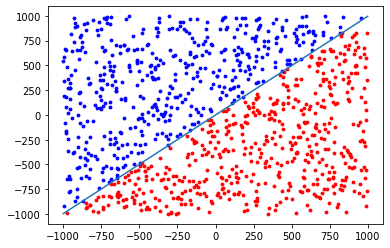

In [31]:
fig, ax = plt.subplots()

tamanho_da_reta = np.arange(-1000, 1000)

for i in n.dados:
    x = i[0]
    y = i[1]
    yd = int(i[2])
    if(yd >= 1):
        plt.scatter(x,y, color='r', s=8)
    else:
        plt.scatter(x,y, color='b', s=8)

m = -n.x1/n.x2
ax.plot(tamanho_da_reta, tamanho_da_reta*m)
plt.show()